In [1]:
pip install pytrends

  Created wheel for pytrends: filename=pytrends-4.7.2-py3-none-any.whl size=14265 sha256=6dd06e00cc6cbeb2b3dc826b6bfcf8d14a756265c9017e1d8527e6b444f73caf
  Stored in directory: c:\users\jdcoh\appdata\local\pip\cache\wheels\58\87\76\aae69ce81a925e574db418628ebbe184387c1e67320697511c
Successfully built pytrends
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
from pytrends.request import TrendReq
pytrend = TrendReq()

In [6]:
#interest per region
#topic chosen is 'Taylor Swift'

Taylor_Swift = pytrend.build_payload(kw_list=['Taylor Swift'])
# Interest by Region
df = pytrend.interest_by_region()
df.head()

,Taylor Swift
geoName,
Afghanistan,0
Albania,0
Algeria,15
American Samoa,0
Andorra,0


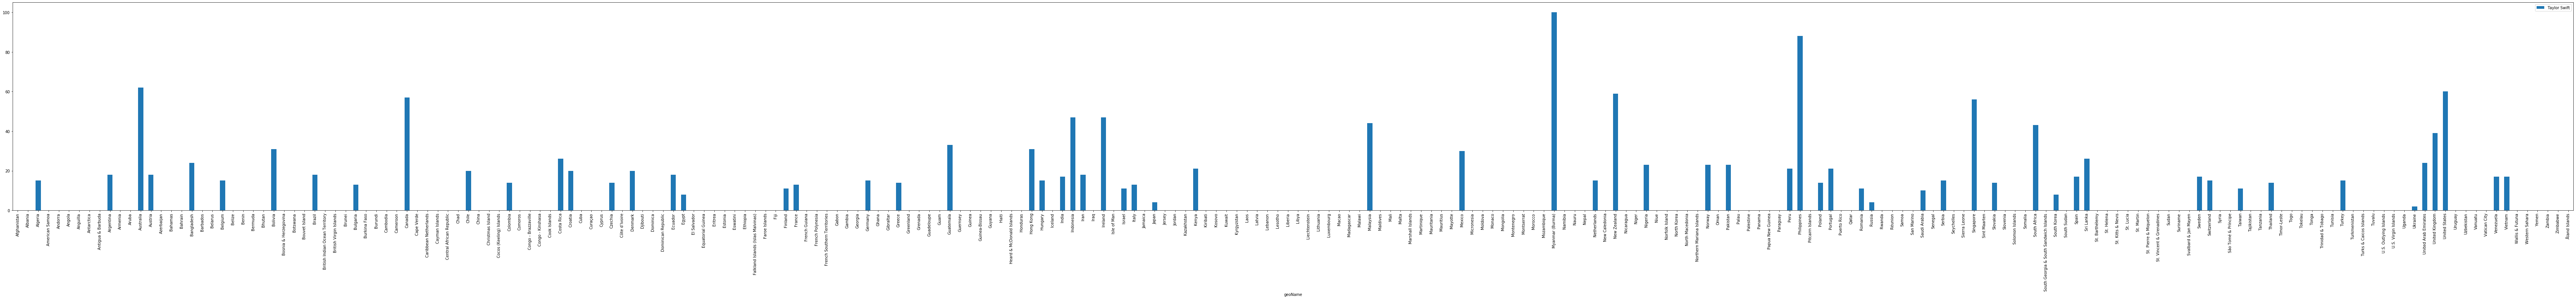

In [10]:
#plot countries vs numbers

df.reset_index().plot(x='geoName', y='Taylor Swift', figsize=(120, 10), kind ='bar')


In [26]:
#top daily search
# Get Google Hot Trends data

df = pytrend.today_searches(pn='US')
df.head()

0          COVID-19
1     Boris Johnson
2     Thomas Massie
3    Ozark Season 3
4        Drew Brees
Name: query, dtype: object

In [32]:

#  Google Top Charts
df = pytrend.top_charts(2019, hl='en-US', tz=300, geo='GLOBAL')
df.head()

,title,exploreQuery
0,India vs South Africa,
1,Cameron Boyce,
2,Copa America,
3,Bangladesh vs India,
4,iPhone 11,


In [46]:
#interest over time
#weekly interest
pytrend.build_payload(kw_list=['football'])
football = pytrend.interest_over_time()
football.tail()

,football,isPartial
date,,
2020-02-23,25,False
2020-03-01,24,False
2020-03-08,21,False
2020-03-15,13,False
2020-03-22,13,True


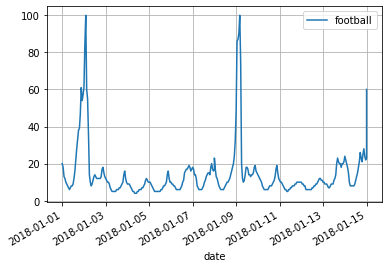

In [58]:
#hourly data
#cant do more than a month

kw_list = ['football']
football = pytrend.get_historical_interest(kw_list, year_start=2018, month_start=1, day_start=1, hour_start=0, year_end=2018, month_end=1, day_end=15, hour_end=0, cat=0, geo='', gprop='', sleep=0)
football.head()
football.plot(grid = True)

In [66]:
from pytrends import dailydata

football:2019-01-01 2019-01-31
football:2019-02-01 2019-02-28
football:2019-03-01 2019-03-31
football:2019-04-01 2019-04-30
football:2019-05-01 2019-05-31
football:2019-06-01 2019-06-30
football:2019-07-01 2019-07-31
football:2019-08-01 2019-08-31
football:2019-09-01 2019-09-30
football:2019-10-01 2019-10-31


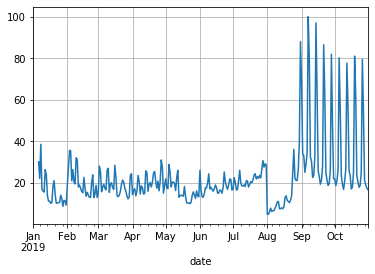

In [76]:
football2 = dailydata.get_daily_data('football', 2019, 1, 2019, 10, geo = '')

football2['football'].plot(grid = True)

In [89]:
# summed hourly data into daily data


daily = football.resample('D').sum()
daily.head(10)





,football,isPartial
date,,
2018-01-01,542,False
2018-01-02,624,False
2018-01-03,201,False
2018-01-04,173,False
2018-01-05,191,False
2018-01-06,270,False
2018-01-07,292,False
2018-01-08,322,False
2018-01-09,758,False


In [91]:
daily.to_csv('football_daily_data.csv')
download_daily = 'football_daily_data.csv'